(102, 2)


Text(0.5, 1.0, 'Resposta do sistema')

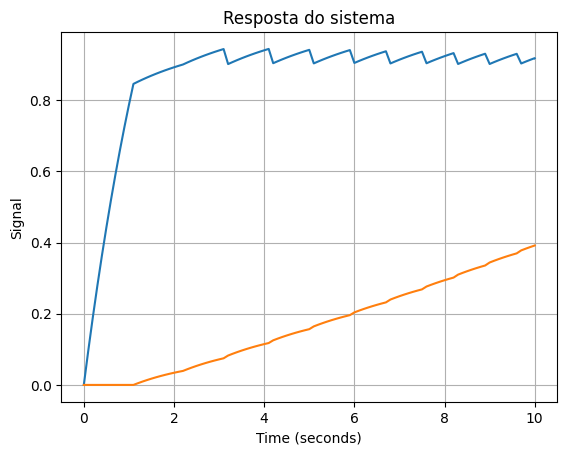

In [1]:
import autograd.numpy as np
from autograd import grad
#import numpy as np
import matplotlib.pyplot as plt

def J(g,tlims):
  ''' run a simulation of a dynamic system and collect the sum of the
  squared errors between the simulated output and the desired output.
  The controller depends on the parameter g, and tlims sets the initial
  and final simulated times for each run.
  '''
  
  N = 10; # Save for later use
  desired = 1.0
  tinit = tlims[0]
  tfinal = tlims[1]
  x = [0.0,0.0]
  output,time = simulate(sys,[tinit,tfinal],x,g)
  sum = np.sum((desired - output[:,0])**2)/len(output[:,0])
  return sum

def sys(t,x,g):
  ref = 1.0
  d = [0.0,0.0]
  C = 0.5
  C2 = 0.5
  error = ref-x[0]
  #print(g)
  if np.abs(error) > np.abs(ref/10.0):
    input = g*np.sign(error)
    integrate = 0.0
  else:
    input = x[1]
    integrate = 1.0
  d[0] = -C*x[0]+input-C2*x[1]
  d[1] = error*g*integrate
  return d

def simulate(fun,trange,x,g):
  t = trange[0]
  h = 0.1
  vx = np.array(x)
  vt = np.zeros((1,))
  while t<trange[1]:
    dt = trange[1]-t
    if dt<h:
      h = dt
    k1 = fun(t,x,g)
    k2 = fun(t+h,[x[i]+k1[i]*h for i in range(len(x))],g)
    x = [x[i] + h/2.0*(k1[i]+k2[i]) for i in range(len(x))]
    vx = np.vstack((vx,np.array(x)))
    t = t + h
    vt = np.vstack((vt,np.array(t)))
  return vx,vt

x = [0.0,0.0]
output,time = simulate(sys,np.array([0.0,10.0]),x,1.0)
print(output.shape)
plt.plot(time, output)
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Signal')
plt.title('Resposta do sistema')

In [5]:
grad_J=grad(J,0)
g = 0.5
tin = 0.0
tout = 20.0
print(f'MSE para o controle normal {J(g,[tin,tout])}')
print(f'Gradiente para g={g}, {grad_J(g,[tin,tout])}')

iteration = 0
dJdg = 10000.0
maxIter = 200
minGrad = 1e-6
alpha = 0.5
grad_g = g
while iteration < maxIter and abs(dJdg) > minGrad:
  dJdg = grad_J(grad_g,[tin,tout])
  grad_g = grad_g - alpha*dJdg
  iteration +=1
print(f'Ganho para o controle normal{grad_g}')
print(f'MSE para o controle  com descida de gradiente {J(grad_g,[tin,tout])}')
print(f'Gradiente para g={grad_g}, {grad_J(grad_g,[tin,tout])}')

MSE para o controle normal 0.06138657926741738
Gradiente para g=0.5, -0.548001008246889
Ganho para o controle normal2.062837801150109
MSE para o controle  com descida de gradiente 0.013417437633025227
Gradiente para g=2.062837801150109, -0.005692407739068833


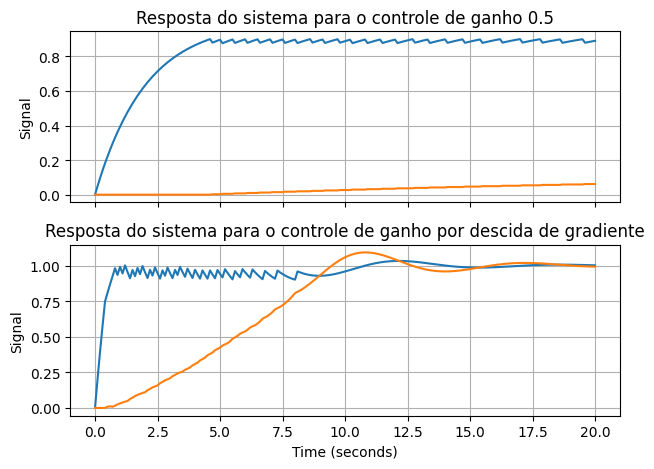

In [13]:
fig, axes = plt.subplots(2,1, sharex=True)
g=0.5
output,time = simulate(sys,np.array([tin,tout]),x,g)
grad_output,grad_time = simulate(sys,np.array([tin,tout]),x,grad_g)
axes[0].plot(time, output)
axes[0].grid()
axes[0].set_ylabel('Signal')
axes[0].set_title(f'Resposta do sistema para o controle de ganho {g}')
axes[1].plot(grad_time, grad_output)
axes[1].grid()
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Signal')
axes[1].set_title('Resposta do sistema para o controle de ganho por descida de gradiente')
fig.tight_layout()